In [1]:
%run "./Ouverture_donnees.ipynb"

<ipython-input-1-6155fb3111bc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gravite'][i] = note
C:\Users\Pauline\AppData\Roaming\Python\Python38\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime

## Outils statistiques et graphiques

#### Diagrammes en bar

In [3]:
def diag_barres_gravite(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite).reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    sns.barplot(x=variable, y="Nombre d'accidents", data=df_crosstab, hue = "gravite", dodge=True, palette = "pastel")

In [4]:
def diag_barres_gravite_cumulees(df, variable) :
    sns.set(rc = {'figure.figsize':(4, 4)})
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().set_index(variable)
    df_crosstab.plot(kind = "bar", stacked=True, color = ["green", "red"])

In [5]:
#On copie-colle la fonction précédente à laquelle on ajoute une dimension "ax" par souci de mise en forme pour la suite (partie "Route")
def diag_barres_gravite_cumulees_axis1(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().set_index(variable)
    df_crosstab.plot(kind = "bar", stacked=True, color = ["green", "red"], ax=ax[1])

In [6]:
def diag_barres_interactif(df, variable) :
    sns.set(rc = {'figure.figsize':(15,8)})
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    df_crosstab["Nombre d'accidents"] = (df_crosstab["Nombre d'accidents"]*100).round(2)
    fig = px.bar(df_crosstab, x=variable, y="Nombre d'accidents", color="gravite", width = 400, height = 400)
    fig.show()

In [7]:
def diag_barres_interactif_usagers(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.grav, normalize = "index").reset_index().melt(id_vars=[variable], value_vars=["Blesse hospitalise", "Blesse leger", "Indemne", "Tue"], var_name = "gravite", value_name = "Nombre d'usagers")
    df_crosstab["Nombre d'usagers"] = (df_crosstab["Nombre d'usagers"]*100).round(2)
    fig = px.bar(df_crosstab, x=variable, y="Nombre d'usagers", color="gravite", width = 400, height = 400)
    fig.show()

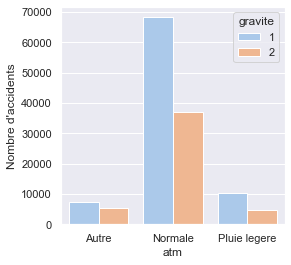

In [22]:
diag_barres_gravite(df, "atm")

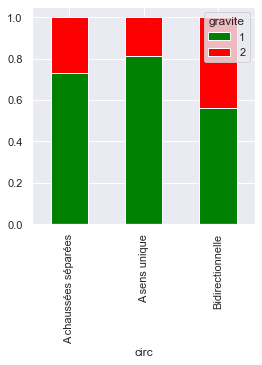

In [23]:
diag_barres_gravite_cumulees(df_accidents, "circ")

#### Camemberts

<AxesSubplot:ylabel='circ'>

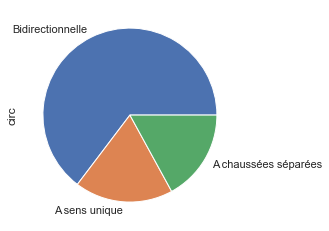

In [24]:
df.circ.value_counts().plot.pie()

<AxesSubplot:ylabel='prof'>

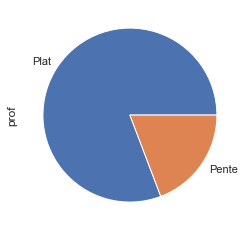

In [25]:
df.prof.value_counts().plot.pie()

## METEO

In [15]:
df_accidents["mois"] = df_accidents["mois"].astype(int)
df_accidents["jour"] = df_accidents["jour"].astype(int)

index = [i for i in range(df_accidents.shape[0])]
df_accidents.index = index

<ipython-input-15-f03832044dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents["mois"] = df_accidents["mois"].astype(int)
<ipython-input-15-f03832044dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents["jour"] = df_accidents["jour"].astype(int)


In [11]:
df_accidents = df_accidents.assign(date=0)
for i in range (df_accidents.shape[0]) :
    df_accidents["date"][i] = datetime.date(2019, df_accidents["mois"][i], df_accidents["jour"][i])

/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df_accidents = df_accidents.assign(accident=1)
df_date = df_accidents.groupby('date').agg({"accident" : 'sum'}).reset_index()
df_date_grav1 = df_accidents[df_accidents.gravite==1].groupby('date').agg({"accident" : 'sum'}).reset_index()
df_date_grav2 = df_accidents[df_accidents.gravite==2].groupby('date').agg({"accident" : 'sum'}).reset_index()

#sns.lineplot(x='date', y = 'accident', data = df_date, color = 'blue')
#sns.lineplot(x='date', y = 'accident', data = df_date_grav1, color = 'green', dashes=True)
#sns.lineplot(x='date', y = 'accident', data = df_date_grav2, color = 'red')

Le grand pic correspond au 20 décembre.

In [29]:
df_accidents = df_accidents.assign(semaine=0)
for i in range (df_accidents.shape[0]) :
    df_accidents["semaine"][i] = (df_accidents["date"][i]).isocalendar()[1]
df_semaine = df_accidents.groupby('semaine').agg({"accident" : 'sum'}).reset_index()
#sns.lineplot(x='semaine', y = 'accident', data = df_semaine, color = 'blue')

/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
#diag_barres_interactif(df_accidents, "atm")
#diag_barres_interactif(df_accidents, "surf")
#diag_barres_interactif(df_accidents, "lum")

In [31]:
#diag_barres_gravite_cumulees(df_accidents, "lum")

## USAGERS

En pourcentage, les conducteurs sortent plus indemnes des accidents que les passagers. \
Il y a une surreprésentation des blessés (légers et hospitalisés) et des tués chez les piétons. Cela semble logique puisqu'un piéton est plus vulnérable.

In [32]:
#diag_barres_interactif_usagers(df_usagers, "catu")

In [33]:
#diag_barres_interactif_usagers(df_usagers, "sexe")

In [34]:
#diag_barres_interactif_usagers(df, "categorie_age")

## STYLE DE CONDUITE

Nous allons étudier l'impact du style de conduite sur le nombre et la gravité des accidents. Le style de conduite est notammenté évalué à travers les variables:
1. motif du trajet (trajet professionnel, de loisirs, autre...)
2. catégorie du véhicule utilisé

Pour étudier la variable trajet, on s'intéresse au motif du trajet par véhicule impliqué dans l'accident. Nous décidons de prendre le motif uniquement du conducteur. On s'intéresse d'abord au pourcentage de véhicules dont le motif de déplacement n'a pas été renseigné (NaN).

###### 1. Motif du trajet

In [27]:
pourcentage_NaN = (df_usagers[df_usagers['catu'].isin(['Conducteur'])].trajet.isna().sum())/len(df_usagers[df_usagers['catu'].isin(['Conducteur'])])*100
print ("Le pourcentage de véhicules accidentés au motif de déplacement inconnu est de " + str(int(pourcentage_NaN)) +"%.")

Le pourcentage de véhicules accidentés au motif de déplacement inconnu est de 33%.


Parmi les 66% de véhicules accidentés restant, on s'intéresse au motif de déplacement des conducteurs.

Text(0.5, 1.0, 'Pourcentage des motifs de déplacement')

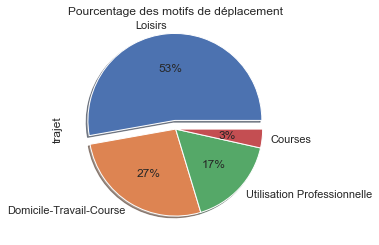

In [31]:
df_usagers[df_usagers['catu'].isin(['Conducteur'])].trajet.value_counts().plot.pie(autopct='%1.0f%%',explode=(0.1,0,0,0),shadow=True)
plt.title('Pourcentage des motifs de déplacement')

Parmi les accidents dont le motif de déplacement est renseigné, plus de la moitié (53%) a lieu lors d'un déplacement de loisirs.

###### 2. Catégorie de véhicule

Pour étudier cette variable, on utilise la base de données avec une ligne par véhicule (df_vehicules), à laquelle on ajoute la variable gravite

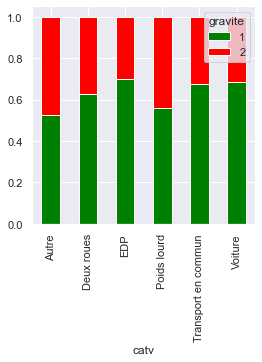

In [10]:
#Ajout de la variable gravite à la base de données véhicules
df_vehicules_gravite = df_vehicules.merge(df[['Num_Acc','gravite']],how='inner',on='Num_Acc')
df_vehicules_gravite.drop_duplicates(keep = 'first', inplace=True)
#Diagramme pondéré de la gravité de l'accident par rapport à la catégorie de véhicule
diag_barres_gravite_cumulees(df_vehicules_gravite,'catv')

In [33]:
#Calculs des pourcentages d'accidents de gravité de type 2 pour chaque catégorie de véhicule
print('Autre:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Autre'])].gravite.mean()-1)*100))+'%')
print('Deux roues:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Deux roues'])].gravite.mean()-1)*100))+'%')
print('EDP:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['EDP'])].gravite.mean()-1)*100))+'%')
print('Poids lourd:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Poids lourd'])].gravite.mean()-1)*100))+'%')
print('Transport en commun:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Transport en commun'])].gravite.mean()-1)*100))+'%')
print('Voiture:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Voiture'])].gravite.mean()-1)*100))+'%')

Autre:47%
Deux roues:37%
EDP:30%
Poids lourd:44%
Transport en commun:32%
Voiture:32%


On remarque que les poids lourds et les véhicules classés dans "Autre" (tracteurs agricoles, side-cars, quads...) sont particulièrement concernés par les accidents de gravité de type 2 (respectivement 44% et 47%). Pour les autres véhicules, les accidents de type 2 représentent environ 32% des accidents. Nous n'observons donc pas particulièrement de corrélation liée à la catégorie du véhicule.

## ROUTE

Nous allons désormais étudier l'impact des caractéristiques de la route empruntée sur le nombre et la gravité de l'accident. Parmi les caractéristiques de la route, nous allons en particulier nous intéresser à:
1. la catégorie de la route (route nationale, autoroute...)
2. le régime de circulation
3. le nombre total de voies de circulation
4. la déclivité de la route à l'endroit de l'accident
5. le tracé général de la route
6. la limitation de vitesse
7. la présence ou non d'obstacle (mobile ou fixe)  

Toutes ces variables seront étudiées par accident et donc avec la base de données df_accidents

###### 1. Catégorie de route

In [9]:
print('NaN:' + str(round(df_accidents['catr'].isna().sum()/len(df_accidents['catr'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

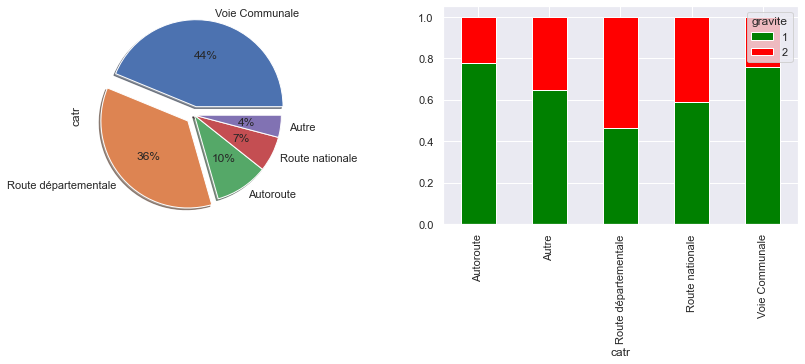

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.catr.value_counts().plot.pie(autopct='%1.0f%%',explode=(0.1,0.1,0,0,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'catr')

In [13]:
#Calculs des pourcentages d'accidents de gravité de type 2 pour chaque catégorie de route
print('Autoroute:'+str(round((df_accidents[df_accidents['catr'].isin(['Autoroute'])].gravite.mean()-1)*100))+'%')
print('Autre:'+str(round((df_accidents[df_accidents['catr'].isin(['Autre'])].gravite.mean()-1)*100))+'%')
print('Route départementale:'+str(round((df_accidents[df_accidents['catr'].isin(['Route départementale'])].gravite.mean()-1)*100))+'%')
print('Route nationale:'+str(round((df_accidents[df_accidents['catr'].isin(['Route nationale'])].gravite.mean()-1)*100))+'%')
print('Voie Communale:'+str(round((df_accidents[df_accidents['catr'].isin(['Voie Communale'])].gravite.mean()-1)*100))+'%')

Autoroute:22%
Autre:36%
Route départementale:54%
Route nationale:41%
Voie Communale:24%


On remarque que la grande majorité des accidents a lieu sur une voie communale (44%) ou sur une route départementale (36%). Mais les accidents sont plus graves sur une route départementale (54% de gravité de type 2) que sur une voie communale (24% de gravité de type 2). On remarque également que les accidents sont plus graves sur une route nationale (41% d'accidents de gravité type 2) que sur une autoroute (22% d'accidents de gravité de type 2).

###### 2. Régime de circulation

In [14]:
print('NaN:' + str(round(df_accidents['circ'].isna().sum()/len(df_accidents['circ'])*100)) +'%')

NaN:5%


Ok variable bien renseignée

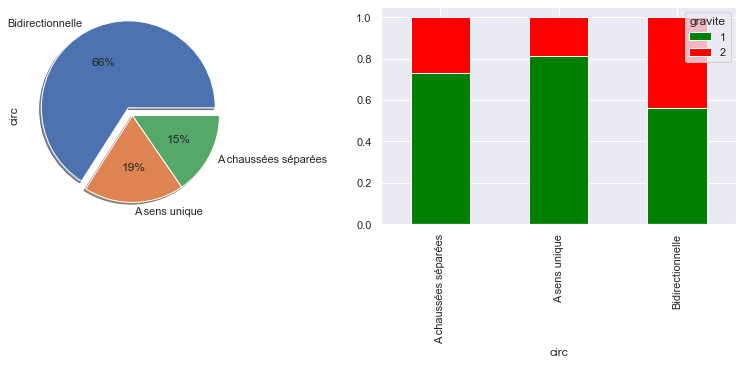

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.circ.value_counts().plot.pie(autopct='%1.0f%%', explode=(0.1,0,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'circ')

In [16]:
#Calculs des pourcentages d'accidents de gravité de type 2 pour chaque régime de circulation
print('Bidirectionnelle:'+str(round((df_accidents[df_accidents['circ'].isin(['Bidirectionnelle'])].gravite.mean()-1)*100))+'%')
print('A sens unique:'+str(round((df_accidents[df_accidents['circ'].isin(['A sens unique'])].gravite.mean()-1)*100))+'%')
print('A chaussées séparées:'+str(round((df_accidents[df_accidents['circ'].isin(['A chaussées séparées'])].gravite.mean()-1)*100))+'%')

Bidirectionnelle:44%
A sens unique:19%
A chaussées séparées:27%


On remarque qu'une grande majorité (66%) des accidents a lieu sur des voies bidirectionnelles et que ces accidents sont plus graves (44% de gravité de type 2) que si ils ont lieu sur des routes à voie unique ou à chaussées séparées.

###### 3. Nombre total de voies de circulation

In [17]:
print('NaN:' + str(round(df_accidents['nbv'].isin([-1]).sum()/len(df_accidents['nbv'])*100)) +'%')

NaN:1%


Ok variable bien renseignée

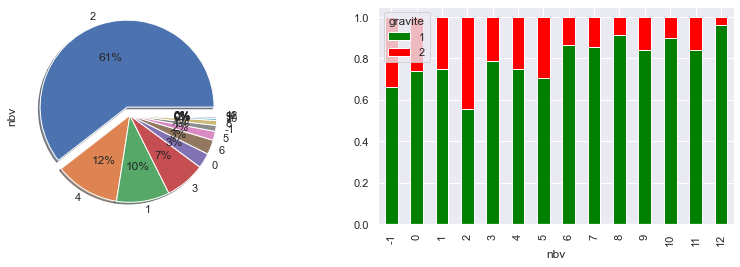

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.nbv.value_counts().plot.pie(autopct='%1.0f%%', explode= (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'nbv')

In [19]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour une route avec 2 voies de circulation
print('2 voies:'+str(round((df_accidents[df_accidents['nbv'].isin([2])].gravite.mean()-1)*100))+'%')

2 voies:44%


On remarque qu'une grande majorité (62%) des accidents a lieu sur des routes à 2 voies et que ces accidents sont plus graves (44% des accidents sont de gravité de type 2) que les accidents qui ont lieu sur des routes avec plus ou moins de voies.  
Ce résultat peut s'expliquer par le fait que la majorité des routes sont à 2 voies.

###### 4. Déclivité de la route à l'endroit de l'accident

In [20]:
print('NaN:' + str(round(df_accidents['prof'].isna().sum()/len(df_accidents['prof'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

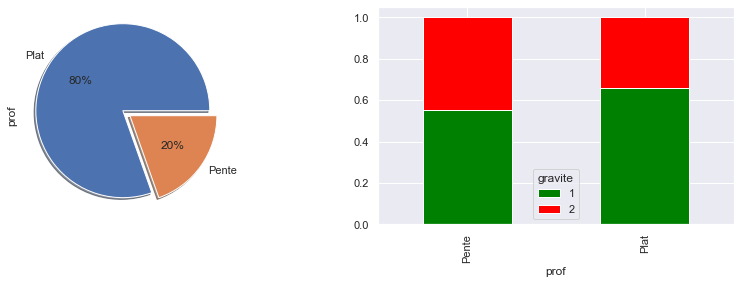

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.prof.value_counts().plot.pie(autopct='%1.0f%%', explode = (0.1,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'prof')

In [23]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque type de déclivité
print('Plat:'+str(round((df_accidents[df_accidents['prof'].isin(['Plat'])].gravite.mean()-1)*100))+'%')
print('Pente:'+str(round((df_accidents[df_accidents['prof'].isin(['Pente'])].gravite.mean()-1)*100))+'%')

Plat:34%
Pente:45%


On remarque qu'une grande majorité (80%) d'accidents ont lieu sur des routes plates, mais que les accidents ayant lieu en pente sont plus graves (45% de gravité de type 2) contre 34% pour les accidents ayant lieu sur terrain plat.

###### 5. Tracé général de la route

In [24]:
print('NaN:' + str(round(df_accidents['plan'].isna().sum()/len(df_accidents['plan'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

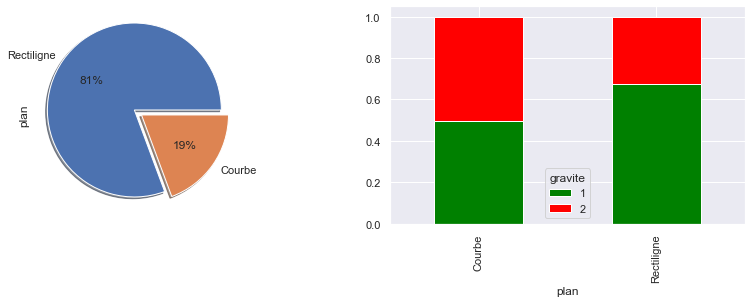

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.plan.value_counts().plot.pie(autopct='%1.0f%%', explode =(0.1,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'plan')

In [26]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque type de tracé
print('Rectiligne:'+str(round((df_accidents[df_accidents['plan'].isin(['Rectiligne'])].gravite.mean()-1)*100))+'%')
print('Courbe:'+str(round((df_accidents[df_accidents['plan'].isin(['Courbe'])].gravite.mean()-1)*100))+'%')

Rectiligne:33%
Courbe:50%


On remarque qu'une grande majorité (81%) d'accidents ont lieu sur des routes rectilignes, mais que les accidents ayant lieu sur des routes avec un tracé en courbe sont plus graves (50% de gravité de type 2) contre 33% pour les accidents ayant lieu sur des routes rectilignes.

###### 6. Limitation de vitesse

In [27]:
print('NaN:' + str(round(df_accidents['vma'].isin([-1]).sum()/len(df_accidents['vma'])*100)) +'%')

NaN:1%


Ok variable bien renseignée

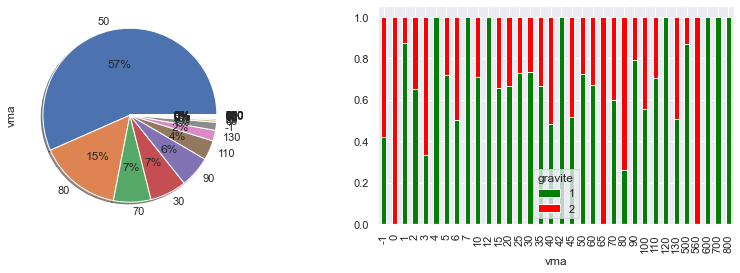

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.vma.value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'vma')

Intéressons nous en particulier aux limitations de vitesse entre 30 et 140 km/h.

<AxesSubplot:xlabel='vma'>

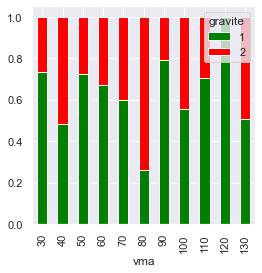

In [34]:
df_vma = df_accidents[df_accidents['vma'].isin([30, 40, 50,60, 70,80,90, 100, 110, 120, 130])]
data = pd.crosstab(df_vma['vma'], df.gravite, normalize = "index").reset_index().set_index('vma')
data.plot(kind = "bar", stacked=True, color = ["green", "red"])

In [35]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque limitation de vitesse
print('30 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([30])].gravite.mean()-1)*100))+'%')
print('40 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([40])].gravite.mean()-1)*100))+'%')
print('50 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([50])].gravite.mean()-1)*100))+'%')
print('60 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([60])].gravite.mean()-1)*100))+'%')
print('70 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([70])].gravite.mean()-1)*100))+'%')
print('80 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([80])].gravite.mean()-1)*100))+'%')
print('90 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([90])].gravite.mean()-1)*100))+'%')
print('100 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([100])].gravite.mean()-1)*100))+'%')
print('110 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([110])].gravite.mean()-1)*100))+'%')
print('120 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([120])].gravite.mean()-1)*100))+'%')
print('130 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([130])].gravite.mean()-1)*100))+'%')

30 km/h:27%
40 km/h:52%
50 km/h:27%
60 km/h:33%
70 km/h:40%
80 km/h:74%
90 km/h:21%
100 km/h:44%
110 km/h:29%
120 km/h:0%
130 km/h:49%


On remarque qu'une grande majorité (57%) des accidents observés ont lieu sur des routes limitées à 50 km/h. Comme on peut s'y attendre, la gravité de l'accident augmente lorsque la limitation de vitesse augmente entre 30 et 80 km/h. Les accidents ayant lieu sur une route limitée à 80 km/h sont particulièrement graves: 74% sont de gravité de type 2. Mais étrangement, les accidents avec une limitation de vitesse strictement supérieures à 90 km/h sont moins graves. Ceci peut s'expliquer par le fait que moins d'accidents y sont observés et, comme vu précédemment, les accidents sur autoroute et route nationale sont moins graves. Notons que les accidents sur des routes limitées à 130 km/h sont de gravité de type 2 à 49%, dangerosité liée à la vitesse.

###### 7. Présence ou non d'obstacle

In [36]:
#Ajout de la variable obstacle à la base de données df_accidents
df_obstacle = df_accidents.merge(df[['Num_Acc','obstacle']], how='inner', on=['Num_Acc'])
df_obstacle.drop_duplicates(keep = 'first', inplace=True)

In [37]:
print('NaN:' + str(round(df_obstacle['obstacle'].isin(['NaN']).sum()/len(df_obstacle['obstacle'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

<AxesSubplot:xlabel='obstacle'>

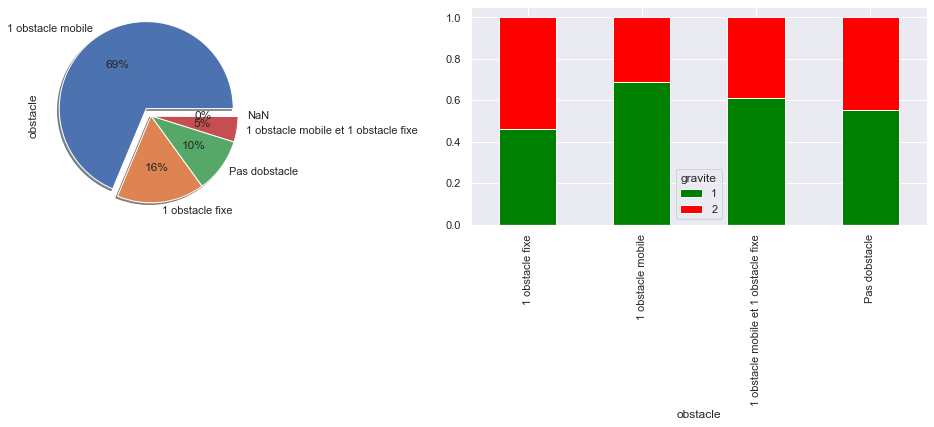

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
df_obstacle.obstacle.value_counts().plot.pie(autopct='%1.0f%%', shadow=True, explode=(0.1,0,0,0,0), ax=ax[0])
data_obstacle = df_obstacle[df_obstacle['obstacle'].isin(['1 obstacle fixe','1 obstacle mobile','1 obstacle mobile et 1 obstacle fixe', 'Pas dobstacle'])]
data = pd.crosstab(data_obstacle['obstacle'], df.gravite, normalize = "index").reset_index().set_index('obstacle')
data.plot(kind = "bar", stacked=True, color = ["green", "red"], ax=ax[1])

In [40]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque type d'obstacle
print('1 obstacle fixe: '+str(round((df_obstacle[df_obstacle['obstacle'].isin(['1 obstacle fixe'])].gravite.mean()-1)*100))+'%')
print('1 obstacle mobile: '+str(round((df_obstacle[df_obstacle['obstacle'].isin(['1 obstacle mobile'])].gravite.mean()-1)*100))+'%')
print('1 obstacle mobile et 1 obstacle fixe: '+str(round((df_obstacle[df_obstacle['obstacle'].isin(['1 obstacle mobile et 1 obstacle fixe'])].gravite.mean()-1)*100))+'%')
print('Pas dobstacle: '+str(round((df_obstacle[df_obstacle['obstacle'].isin(['Pas dobstacle'])].gravite.mean()-1)*100))+'%')

1 obstacle fixe: 54%
1 obstacle mobile: 31%
1 obstacle mobile et 1 obstacle fixe: 39%
Pas dobstacle: 44%


On remarque que la plupart des accidents ont rencontré un obstacle, dont une très grande majorité (69%) un obstacle mobile. Cependant, rencontrer ou non un obstacle n'est pas déterminant de la gravité de l'accident: 31% des accidents avec un obstacle mobile sont de gravité de type 2 tandis que 44% des accidents sans obstacle sont de gravité de type 2. La gravité de l'accident ne semble donc pas corrélée avec la présence ou non d'un obstacle.

En résumé, les principales conclusions de cette partie sont:
- les accidents sont plus nombreux sur les routes départementales et les voies communales, et plus graves sur les routes départementales
- les accidents sont plus nombreux et plus graves sur les routes bidirectionnelles
- les accidents sont plus nombreux et plus graves sur les routes à 2 voies
- les accidents sont plus nombreux sur les routes plates mais ils sont plus graves sur les routes en pente
- les accidents sont plus nombreux sur les routes rectilignes mais ils sont plus graves sur les routes en courbe
- les accidents sont plus nombreux sur les routes limitées à 50 km/h, mais ils sont plus graves sur les routes limitées à 80 km/h
- la majorité des accidents ont rencontré 1 obstacle mobile mais la variable obstacle ne semble pas être corrélée à la gravité de l'accident

## ACCIDENTS

Etudions désormais les caractéristiques propres à l'accident, à travers:
1. l'endroit du choc sur le véhicule
2. le nombre d'usagers impliqués dans l'accident

###### 1. endroit du choc sur le véhicule

On étudie cette variable par véhicule, avec la base de données df_vehicules_gravite créée précédemment

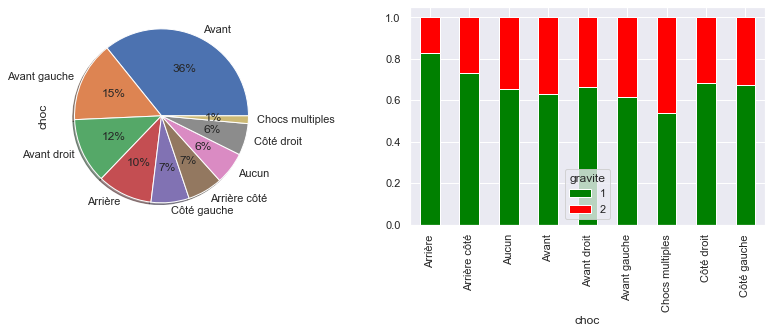

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_vehicules_gravite.choc.value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_vehicules_gravite,'choc')

Localisations du choc diverses, avec une petite dominance à l'avant (36%). Pas de localisation du choc avec une gravité apparente plus élevée...

Dessin ??

###### 2. nombre d'usagers dans le véhicule

On étudie cette variable par accident, et donc avec la base de données df_accidents

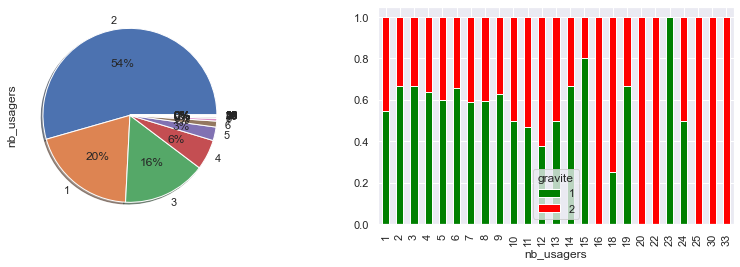

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.nb_usagers.value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'nb_usagers')

Intéressons nous en particulier aux accidents impliquant 1,2,3 et 4 usagers (>5%)

In [13]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour les accidents impliquant 1,2,3 et 4 usagers
print('1 usager: '+str(round((df_accidents[df_accidents['nb_usagers'].isin([1])].gravite.mean()-1)*100))+'%')
print('2 usagers: '+str(round((df_accidents[df_accidents['nb_usagers'].isin([2])].gravite.mean()-1)*100))+'%')
print('3 usagers: '+str(round((df_accidents[df_accidents['nb_usagers'].isin([3])].gravite.mean()-1)*100))+'%')
print('4 usagers: '+str(round((df_accidents[df_accidents['nb_usagers'].isin([4])].gravite.mean()-1)*100))+'%')

1 usager: 45%
2 usagers: 33%
3 usagers: 33%
4 usagers: 36%


On remarque que la majorité (54%) des accidents implique uniquement 2 usagers. Notons que même 20% des accidents impliquent uniquement 1 usager. Ces accidents sont même étonnament plus graves (45% de gravité de type 2) que ceux impliquant 2 à 8 usagers.  
Comme on peut s'y attendre, les accident impliquant plus de 8 usagers sont en général plus graves.